# Simple Linear Regression (One Variable) — Closed-Form Solution

This notebook demonstrates **Linear Regression** with **one feature**, solved using the **closed-form analytical method** (not gradient descent).  

---

## 1️⃣ Problem Statement

We want to fit a line to our data:

$$
y = w \cdot x + b
$$

Where:  
- \(w\) = slope of the line  
- \(b\) = intercept  

Objective: Minimize the **Mean Squared Error (MSE)**:

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))^2
$$

---

## 2️⃣ Closed-Form Analytical Solution

For a single variable, the **best-fit slope and intercept** can be derived directly (no iterations needed):

$$
w = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - w \bar{x}
$$

Where:  
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i, \quad
\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

---

## 3️⃣ Implementation Steps

1. Define the dataset \(X\) and \(y\)  
2. Compute the mean of \(X\) and \(y\)  
3. Calculate the slope \(w\) and intercept \(b\)  
4. Make predictions:

$$
\hat{y} = w \cdot x + b
$$

5. Plot the data and the regression line


In [1]:
# Dataset
X_train= [0.5, 1, 2, 3, 4, 5, 7, 10, 16] # input feature
y_train = [2, 4, 6, 8, 10, 13, 9, 11, 14] # target / output

In [2]:
# Compute means
x_mean = sum(X_train) / len(X_train) # mean of X_train
y_mean = sum(y_train) / len(y_train) # mean of y_train

In [3]:
# Compute slope w
numerator = sum((X_train[i] - x_mean) * (y_train[i] - y_mean) for i in range(len(X_train)))
denominator = sum((X_train[i] - x_mean)**2 for i in range(len(X_train)))
W = numerator / denominator

# Compute intercept b
b = y_mean - W * x_mean

# Compute the equation of the regression line
y_line = [W * x + b for x in X_train]
 
print("Slope (W):", W)
print("Intercept (b):", b)

Slope (W): 0.643854748603352
Intercept (b): 5.085893854748603


In [4]:
# Make predictions on new data set
X_new = [1.5, 3.5, 4.2, 6, 8, 10, 12, 13, 15] # new dateset
y_new = [W * x + b for x in X_new]
print("Predicted y:", y_new)

Predicted y: [6.051675977653631, 7.339385474860335, 7.790083798882682, 8.949022346368714, 10.23673184357542, 11.524441340782122, 12.812150837988828, 13.456005586592179, 14.743715083798882]


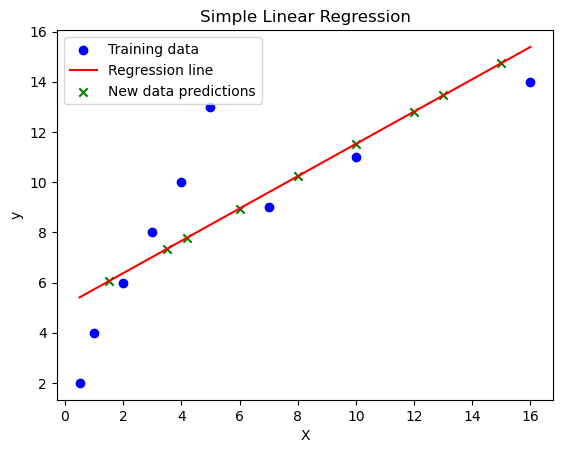

In [5]:
# Visualization
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X_train, y_line, color="red", label="Regression line")
plt.scatter(X_new, y_new, color="green", marker="x", label="New data predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

---

## 4️⃣ Comparison with scikit-learn

Now, we validate the manual closed-form solution against the **industry standard**:  
the `LinearRegression` implementation from **scikit-learn**.

---

### Steps

1. Prepare the dataset in the format required by scikit-learn.  
2. Fit a `LinearRegression` model on the training data.  
3. Extract the learned slope and intercept from the model.  
4. Use the model to make predictions.  
5. Evaluate the model using metrics such as Mean Squared Error (MSE) and R².  
6. Plot the regression line from scikit-learn alongside the manual closed-form solution.  

---

✅ **Expected outcome:**  
- The slope and intercept from scikit-learn match the manual closed-form values.  
- Both regression lines overlap perfectly.  
- Metrics (MSE, R²) confirm the fit is identical.  

---


In [7]:
# 1. Prepare the dataset in the format required by scikit-learn.    
import numpy as np

# Assume X_train and y_train are your original lists
X_train_2d = np.array(X_train).reshape(-1, 1)  # convert to 2D array (n_samples, 1 feature)
y_train_arr = np.array(y_train)                # convert to numpy array (1D)

In [ ]:
# 2. Fit a `LinearRegression` model on the training data.
from sklearn.linear_model import LinearRegression  # Import LinearRegression class from scikit-learn

model = LinearRegression()  # Create a LinearRegression model object

model.fit(X_train_2d, y_train_arr)  # Fit the model to the training data (X: 2D array, y: target values)

In [10]:
# 3. Extract the learned slope and intercept from the model.  
w_sklearn = model.coef_[0]      # Extract the slope (coefficient) from the fitted model
b_sklearn = model.intercept_    # Extract the intercept from the fitted model

print("Slope (w_sklearn):", w_sklearn)  # Print the slope
print("Intercept (b_sklearn):", b_sklearn)  # Print the intercept

Slope (w_sklearn): 0.6438547486033522
Intercept (b_sklearn): 5.085893854748601


In [13]:

# 4. Use the model to make predictions.  
# Predict y values for the training set using the fitted model
y_pred_sklearn = model.predict(X_train_2d)  # Returns an array of predicted y values

# Print the predictions
print("Predicted y (scikit-learn):", y_pred_sklearn)

Predicted y (scikit-learn): [ 5.40782123  5.7297486   6.37360335  7.0174581   7.66131285  8.3051676
  9.59287709 11.52444134 15.38756983]


In [14]:
# 5. Evaluate the model using metrics such as Mean Squared Error (MSE) and R².
from sklearn.metrics import mean_squared_error, r2_score
# Compute evaluation metrics
mse = mean_squared_error(y_train_arr, y_pred_sklearn)  # Mean Squared Error
r2 = r2_score(y_train_arr, y_pred_sklearn)            # R² score

print("Mean Squared Error (MSE):", mse)
print("R² score:", r2)

Mean Squared Error (MSE): 5.085893854748605
R² score: 0.643017849016779


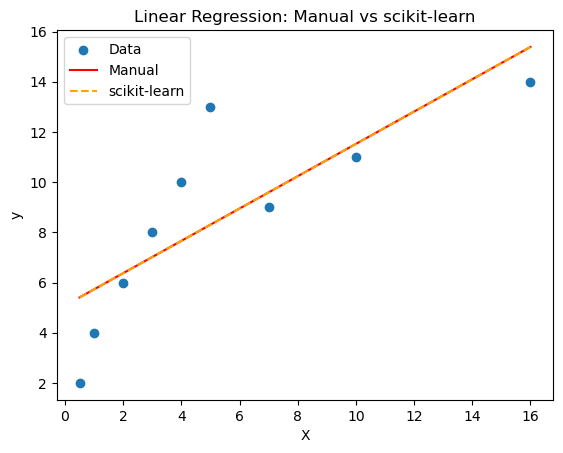

In [15]:
# 6. Plot the regression line from scikit-learn alongside the manual closed-form solution.
# Plot training data and regression lines
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train_arr, label="Data")          # Original data points
plt.plot(X_train, y_line, color="red", label="Manual")   # Manual closed-form line
plt.plot(X_train, y_pred_sklearn, "--", color="orange", label="scikit-learn")  # sklearn line
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Manual vs scikit-learn")
plt.legend()
plt.show()